# Graphene

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

# Lattice constants
a = 1.42  # Nearest-neighbor bond length
a0 = np.sqrt(3) * a  # Lattice constant

# Lattice vectors
a1 = np.array([a0, 0])
a2 = np.array([a0/2, np.sqrt(3)*a0/2])

# Basis atoms
basis = np.array([[0, 0], [a/np.sqrt(3), 0]])

# Generate lattice points
num_cells = 5  # Number of unit cells along each direction
atoms = []
for i in range(-num_cells, num_cells):
    for j in range(-num_cells, num_cells):
        R = i * a1 + j * a2
        for b in basis:
            atoms.append(R + b)

atoms = np.array(atoms)


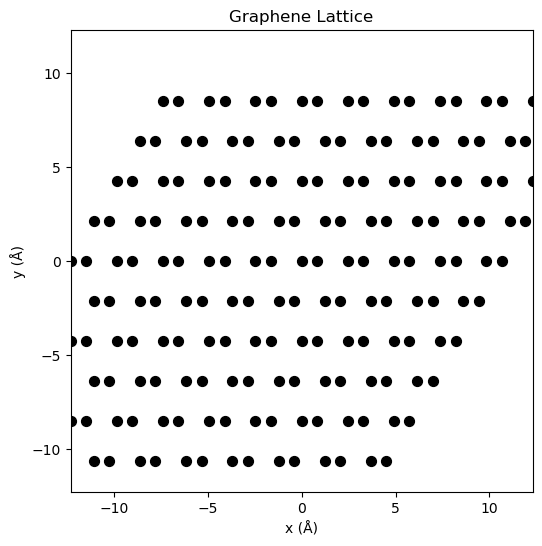

In [3]:
# Plot the graphene lattice
plt.figure(figsize=(6, 6))
plt.scatter(atoms[:, 0], atoms[:, 1], c='black', s=50)
plt.xlim(-num_cells * a0, num_cells * a0)
plt.ylim(-num_cells * a0, num_cells * a0)
plt.gca().set_aspect('equal')
plt.xlabel("x (Å)")
plt.ylabel("y (Å)")
plt.title("Graphene Lattice")
plt.show()